In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import json



ds = load_dataset("google-research-datasets/go_emotions", "simplified")

# Combine all splits into a single DataFrame
train_df = pd.DataFrame(ds['train'])
validation_df = pd.DataFrame(ds['validation'])
test_df = pd.DataFrame(ds['test'])
combined_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)

# Load the emotion labels mapping from the JSON file
with open('../utils/emotion_labels_mapping.json', 'r') as json_file:
    emotion_mapping = json.load(json_file)
with open('../utils/ekman_mapping.json', 'r') as json_file:
    ekman_mapping = json.load(json_file)
with open('../utils/sentiment_mapping.json', 'r') as json_file:
    sentiment_mapping = json.load(json_file)    

combined_df['emotion_labels'] = combined_df['labels'].apply(lambda labels: [emotion_mapping[str(label)] for label in labels])

emotion_to_ekman = {}
for ekman_emotion, emotions in ekman_mapping.items():
    for emotion in emotions:
        emotion_to_ekman[emotion] = ekman_emotion
combined_df['ekman_labels'] = combined_df['emotion_labels'].apply(lambda labels: [emotion_to_ekman[label] for label in labels])

emotion_to_sentiment = {}
for sentiment, emotions in sentiment_mapping.items():
    for emotion in emotions:
        emotion_to_sentiment[emotion] = sentiment
combined_df['sentiment_labels'] = combined_df['emotion_labels'].apply(lambda labels: [emotion_to_sentiment[label] for label in labels])

/Users/lile/anaconda3/envs/NLP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
combined_df.head()

,text,labels,id,emotion_labels,ekman_labels,sentiment_labels
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral],[neutral],[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral],[neutral],[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger],[anger],[negative]
3,To make her feel threatened,[14],ed7ypvh,[fear],[fear],[negative]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance],[anger],[negative]


In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54263 entries, 0 to 54262
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              54263 non-null  object
 1   labels            54263 non-null  object
 2   id                54263 non-null  object
 3   emotion_labels    54263 non-null  object
 4   ekman_labels      54263 non-null  object
 5   sentiment_labels  54263 non-null  object
dtypes: object(6)
memory usage: 2.5+ MB


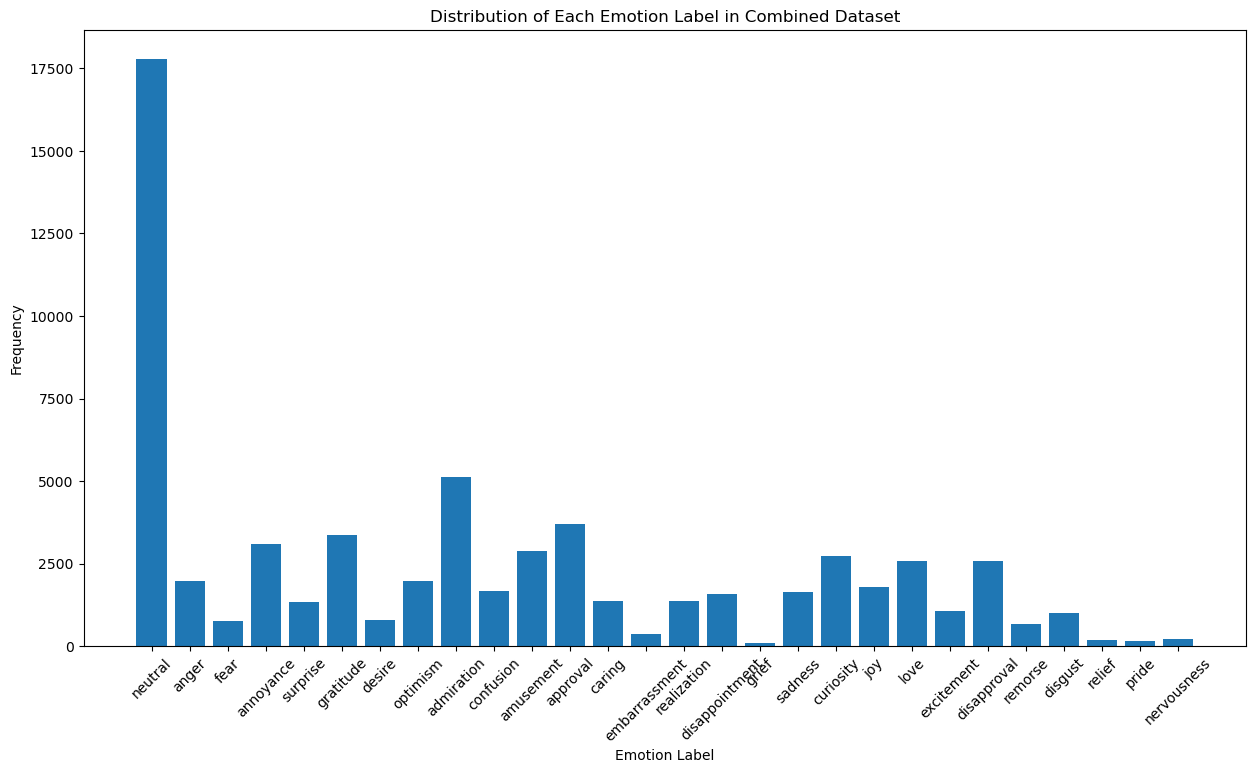

           Emotion  Percentage
0          neutral   27.850561
8       admiration    8.026703
11        approval    5.777910
5        gratitude    5.284273
3        annoyance    4.847051
10       amusement    4.536764
18       curiosity    4.267222
22     disapproval    4.044694
20            love    4.036858
7         optimism    3.096596
1            anger    3.071523
19             joy    2.797280
9        confusion    2.621764
17         sadness    2.546543
15  disappointment    2.480725
14     realization    2.165737
12          caring    2.154767
4         surprise    2.084247
21      excitement    1.648593
24         disgust    1.587476
6           desire    1.255250
2             fear    1.197267
23         remorse    1.048392
13   embarrassment    0.587664
27     nervousness    0.325958
25          relief    0.285213
26           pride    0.222529
16           grief    0.150442


In [4]:
# Flatten the emotion labels for counting
flattened_emotion_labels = [label for labels in combined_df['emotion_labels'] for label in labels]
emotion_label_counts = Counter(flattened_emotion_labels)
total_labels = len(flattened_emotion_labels)
emotion_label_percentages = {label: (count / total_labels) * 100 for label, count in emotion_label_counts.items()}

# Plot the distribution of each emotion label
plt.figure(figsize=(15, 8))
plt.bar(emotion_label_counts.keys(), emotion_label_counts.values())
plt.xlabel('Emotion Label')
plt.ylabel('Frequency')
plt.title('Distribution of Each Emotion Label in Combined Dataset')
plt.xticks(rotation=45)
plt.show()

# Display the percentage of each emotion label
emotion_percentage_df = pd.DataFrame(list(emotion_label_percentages.items()), columns=['Emotion', 'Percentage'])
print(emotion_percentage_df.sort_values(by='Percentage', ascending=False))

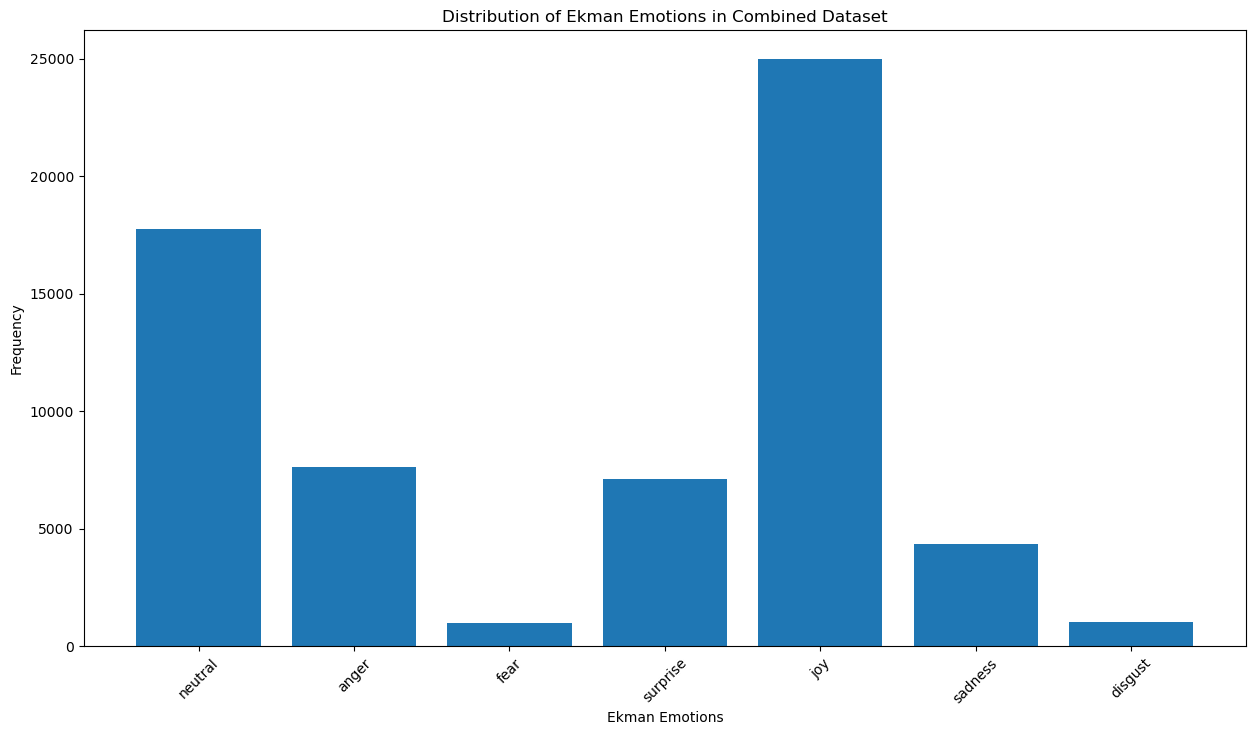

  Ekman_Emotion  Percentage
4           joy   39.122736
0       neutral   27.850561
1         anger   11.963267
3      surprise   11.138971
5       sadness    6.813765
6       disgust    1.587476
2          fear    1.523224


In [5]:
# Flatten the emotion labels for counting
flattened_emotion_labels = [label for labels in combined_df['ekman_labels'] for label in labels]
emotion_label_counts = Counter(flattened_emotion_labels)
total_labels = len(flattened_emotion_labels)
emotion_label_percentages = {label: (count / total_labels) * 100 for label, count in emotion_label_counts.items()}

# Plot the distribution of each emotion label
plt.figure(figsize=(15, 8))
plt.bar(emotion_label_counts.keys(), emotion_label_counts.values())
plt.xlabel('Ekman Emotions')
plt.ylabel('Frequency')
plt.title('Distribution of Ekman Emotions in Combined Dataset')
plt.xticks(rotation=45)
plt.show()

# Display the percentage of each emotion label
emotion_percentage_df = pd.DataFrame(list(emotion_label_percentages.items()), columns=['Ekman_Emotion', 'Percentage'])
print(emotion_percentage_df.sort_values(by='Percentage', ascending=False))

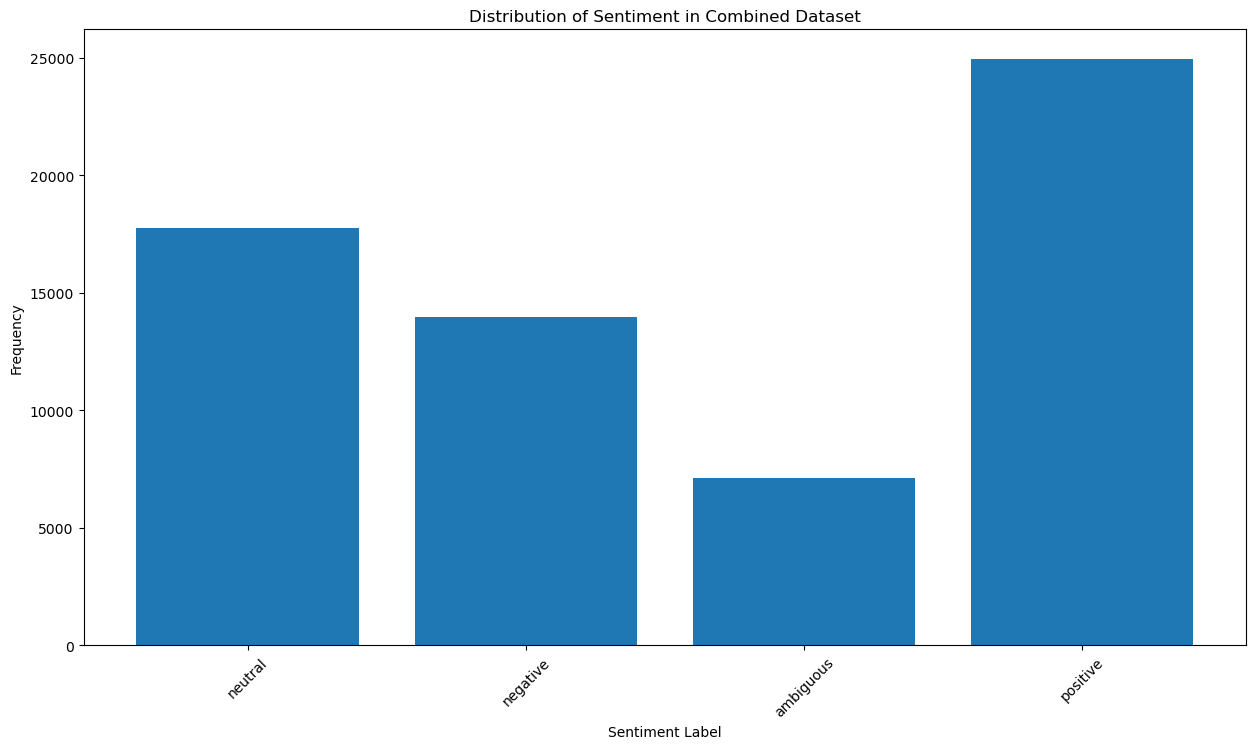

  Sentiment_Emotion  Percentage
3          positive   39.122736
0           neutral   27.850561
1          negative   21.887733
2         ambiguous   11.138971


In [6]:
# Flatten the emotion labels for counting
flattened_emotion_labels = [label for labels in combined_df['sentiment_labels'] for label in labels]
emotion_label_counts = Counter(flattened_emotion_labels)
total_labels = len(flattened_emotion_labels)
emotion_label_percentages = {label: (count / total_labels) * 100 for label, count in emotion_label_counts.items()}

# Plot the distribution of each emotion label
plt.figure(figsize=(15, 8))
plt.bar(emotion_label_counts.keys(), emotion_label_counts.values())
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment in Combined Dataset')
plt.xticks(rotation=45)
plt.show()

# Display the percentage of each emotion label
emotion_percentage_df = pd.DataFrame(list(emotion_label_percentages.items()), columns=['Sentiment_Emotion', 'Percentage'])
print(emotion_percentage_df.sort_values(by='Percentage', ascending=False))

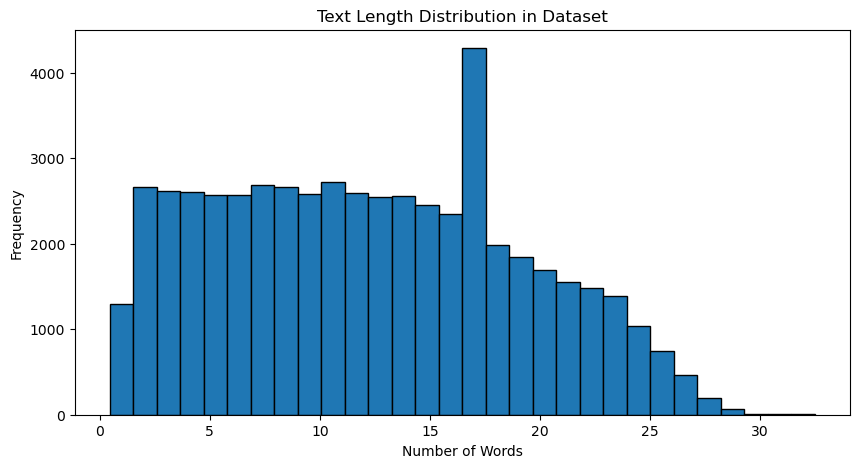

Average text length: 12.82 words


In [7]:
# Calculate the length of each text sample
text_lengths = [len(text.split()) for text in combined_df['text']]

# Plot text length distribution
plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=30, edgecolor='black', align='left')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Text Length Distribution in Dataset')
plt.show()

print(f"Average text length: {sum(text_lengths) / len(text_lengths):.2f} words")


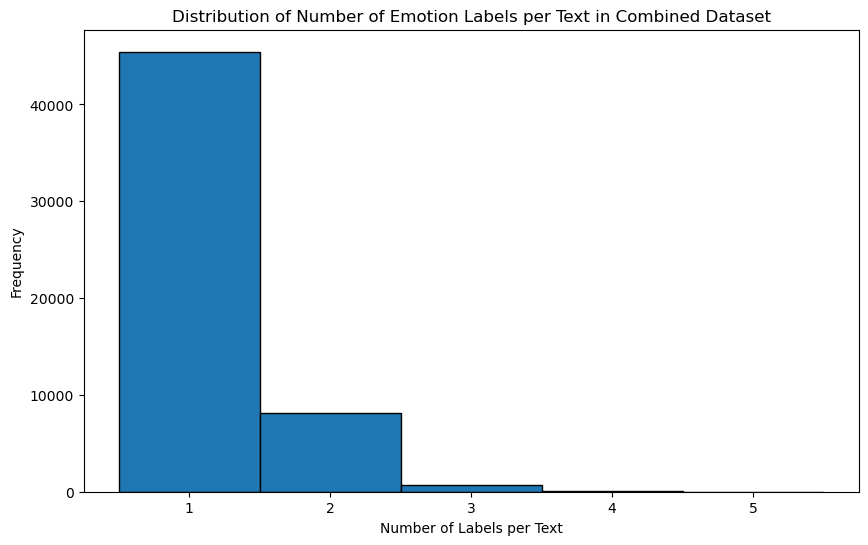

num_emotion_labels
1    83.751359
2    14.971528
3     1.207084
4     0.068186
5     0.001843
Name: count, dtype: float64


In [8]:
# Calculate the number of labels for each text in the original dataset
combined_df['num_emotion_labels'] = combined_df['labels'].apply(len)
num_labels_counts = combined_df['num_emotion_labels'].value_counts().sort_index()
num_labels_percentages = (num_labels_counts / len(combined_df)) * 100


# Plot the distribution of the number of emotion labels per text
plt.figure(figsize=(10, 6))
plt.hist(combined_df['num_emotion_labels'], bins=range(1, combined_df['num_emotion_labels'].max() + 2), edgecolor='black', align='left')
plt.xlabel('Number of Labels per Text')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Emotion Labels per Text in Combined Dataset')
plt.xticks(range(1, combined_df['num_emotion_labels'].max() + 1))
plt.show()

print(num_labels_percentages)
